# Imports etc.

In [1]:
import json
import numpy as np
import os
import pandas as pd
import plotnine as gg
gg.theme_set(gg.theme_classic)
default_figure_size = (6.4, 4.8)

In [2]:
# data_dir = 'C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1'
data_dir = 'C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34'
plot_dir = data_dir + 'figures'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

## Get all_data

In [3]:
rule_data = pd.read_csv(os.path.join(data_dir, 'rule_data.csv'), index_col=0)
rule_data.loc[rule_data.phase == 'high'][:30]

,sid,phase,goal_id,lowRules,highRules,lowTransferRules,highTransferRules,lowRulesBoth,lowRulesLearnOnly,lowRulesTransferOnly,highRulesBoth,highRulesLearnOnly,highRulesTransferOnly
0,0,high,0,"[0, 1]","[3, 0]",NaN,"[3, 0]","[0, 1]",NaN,NaN,"[3, 0]",NaN,NaN
3,1,high,0,"[3, 0]","[1, 0]",NaN,"[1, 3]","[3, 0]",NaN,NaN,NaN,"[1, 0]","[1, 3]"
4,2,high,0,"[1, 2]","[3, 0]",NaN,"[2, 0]","[1, 2]",NaN,NaN,NaN,"[3, 0]","[2, 0]"
7,3,high,0,"[0, 1]","[0, 2]",NaN,"[0, 2]","[0, 1]",NaN,NaN,"[0, 2]",NaN,NaN
8,4,high,0,"[3, 0]","[2, 0]",NaN,"[2, 3]","[3, 0]",NaN,NaN,NaN,"[2, 0]","[2, 3]"
10,5,high,0,"[2, 3]","[1, 0]",NaN,"[1, 0]","[2, 3]",NaN,NaN,"[1, 0]",NaN,NaN
13,6,high,0,"[2, 3]","[3, 2]",NaN,"[3, 2]","[2, 3]",NaN,NaN,"[3, 2]",NaN,NaN
15,7,high,0,"[2, 3]","[2, 0]",NaN,"[2, 0]","[2, 3]",NaN,NaN,"[2, 0]",NaN,NaN
17,8,high,0,"[0, 1]","[1, 3]",NaN,"[2, 3]","[0, 1]",NaN,NaN,NaN,"[1, 3]","[2, 3]"
18,9,high,0,"[3, 0]","[2, 1]",NaN,"[2, 1]","[3, 0]",NaN,NaN,"[2, 1]",NaN,NaN


In [4]:
all_data = pd.read_csv(os.path.join(data_dir, 'all_data.csv'), index_col=0)
incl_data = all_data.loc[np.invert(all_data.chance_performer) & np.invert(all_data.inattentives)]
all_data

,rt,stimulus,key_press,trial_type,trial_index,time_elapsed,internal_node_id,phase,block,trial,...,bool_unlocked_star_highRules,bool_unlocked_star_highTransferRules,bool_middle_item_lowRulesBoth,bool_middle_item_lowRulesLearnOnly,bool_middle_item_lowRulesTransferOnly,bool_unlocked_star_highRulesBoth,bool_unlocked_star_highRulesLearnOnly,bool_unlocked_star_highRulesTransferOnly,chance_performer,inattentives
0,797.865,0,85.0,learning,297,2422963,0.0-77.0-0.0,high,0.0,0.0,...,0,0,0,0,0,0,0,0,False,False
1,654.720,0,73.0,learning,298,2423619,0.0-77.0-1.0,high,0.0,0.0,...,0,0,1,0,0,0,0,0,False,False
2,1317.900,0,79.0,learning,299,2424938,0.0-77.0-2.0,high,0.0,0.0,...,0,0,0,0,0,0,0,0,False,False
3,276.305,0,80.0,learning,300,2425216,0.0-77.0-3.0,high,0.0,0.0,...,0,0,0,0,0,0,0,0,False,False
4,823.310,0,85.0,learning,302,2426546,0.0-78.0-0.0,high,0.0,1.0,...,0,0,0,0,0,0,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197885,73.000,0,80.0,transfer,190,55528,0.0-51.0-3.0,low,1.0,1.0,...,0,0,0,0,0,0,0,0,True,False
197886,242.000,0,85.0,transfer,192,56288,0.0-52.0-0.0,low,1.0,2.0,...,0,0,0,0,0,0,0,0,True,False
197887,34.000,0,73.0,transfer,193,56330,0.0-52.0-1.0,low,1.0,2.0,...,0,0,0,0,1,0,0,0,True,False
197888,53.000,0,79.0,transfer,194,56391,0.0-52.0-2.0,low,1.0,2.0,...,0,0,0,0,0,0,0,0,True,False


# Results

## Learning curves

### Individual participants

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\2_LearnCurves_Trial_all.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 148702 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 148702 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\2_LearnCurves_Trial.png
C:\Users\maria\Anaconda3\envs\notebo

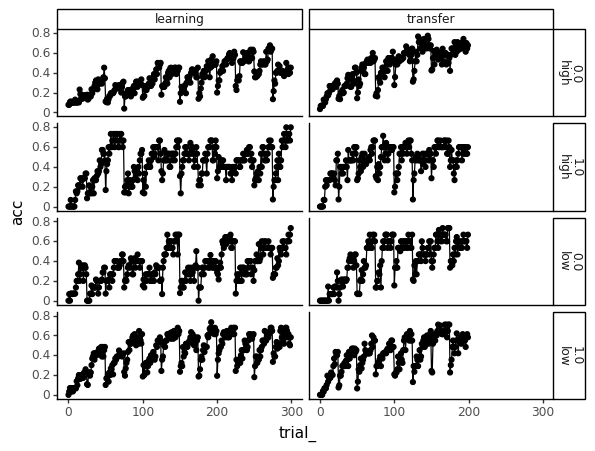

<ggplot: (116303561439)>

In [19]:
# Learning curves, averaging over goal stars 
def plot_LearnCurves_Trial(dat, suf=''):
    
    g = (gg.ggplot(dat, gg.aes('trial_', 'acc'))
         + gg.stat_summary(fun_y=np.mean, geom='point')
         + gg.stat_summary(fun_y=np.mean, geom='line')
         + gg.facet_grid('phase + phaseNum ~ trial_type')
        )
    g.save(os.path.join(plot_dir, '2_LearnCurves_Trial{}.png'.format(suf)))
    
    return g

# Use
learn_curves_all = plot_LearnCurves_Trial(all_data, '_all')
learn_curves = plot_LearnCurves_Trial(incl_data)
learn_curves

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\2_LearnCurves_Block.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 136770 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 136770 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 136770 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 136770 rows containing non-finite values.


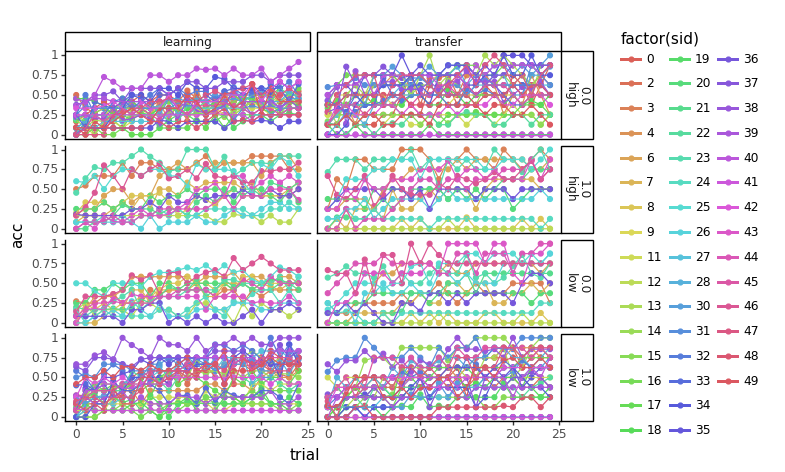

<ggplot: (116303744687)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\2_LearnCurves_Block_all.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 148702 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 148702 rows containing non-finite values.


In [20]:
# Learning curves, trial-by-trial
learn_curves2 = learn_curves + gg.aes(x='trial', color='factor(sid)')
learn_curves2.save(os.path.join(plot_dir, '2_LearnCurves_Block.png'))
print(learn_curves2)

learn_curves_all2 = learn_curves_all + gg.aes(x='trial', color='factor(sid)', linetype='chance_performer')
learn_curves_all2.save(os.path.join(plot_dir, '2_LearnCurves_Block_all.png'))

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\2_LearnCurves_Star.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 136770 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 136770 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 136770 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 136770 rows containing non-finite values.


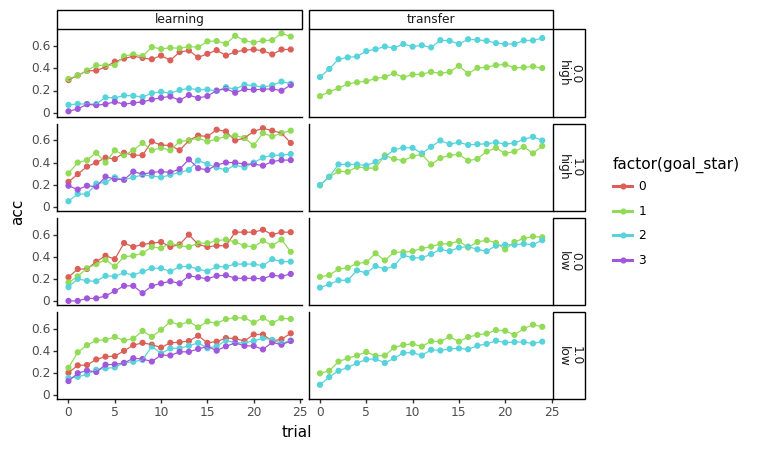

<ggplot: (116295601333)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\2_LearnCurves_Star_all.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 148702 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 148702 rows containing non-finite values.


In [21]:
# Learning curves, trial-by-trial
learn_curves3 = learn_curves + gg.aes(x='trial', color='factor(goal_star)')
learn_curves3.save(os.path.join(plot_dir, '2_LearnCurves_Star.png'))
print(learn_curves3)

learn_curves_all3 = learn_curves_all + gg.aes(x='trial', color='factor(goal_star)')
learn_curves_all3.save(os.path.join(plot_dir, '2_LearnCurves_Star_all.png'))

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 148702 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 148702 rows containing non-finite values.


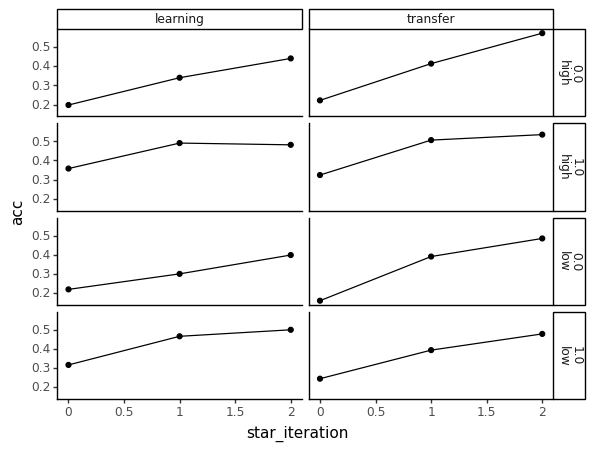

<ggplot: (116295601213)>

In [22]:
learn_curves_all4 = learn_curves_all + gg.aes(x='star_iteration')
learn_curves_all4

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 148702 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 148702 rows containing non-finite values.


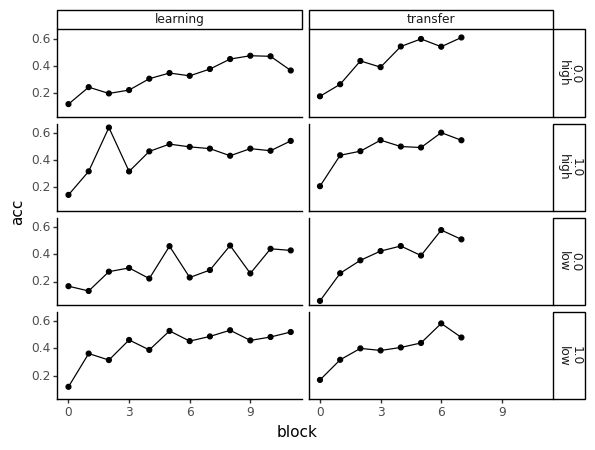

<ggplot: (116297013833)>

In [23]:
learn_curves_all5 = learn_curves_all + gg.aes(x='block')
learn_curves_all5

### Population average

In [24]:
id_cols = ['sid', 'trial_type', 'phase', 'phaseNum', 'trial']
learn_curves_sum = incl_data.groupby(id_cols).aggregate('mean').reset_index()[id_cols + ['acc']]
learn_curves_sum

,sid,trial_type,phase,phaseNum,trial,acc
0,0,learning,high,0.0,0.0,0.166667
1,0,learning,high,0.0,1.0,0.250000
2,0,learning,high,0.0,2.0,0.333333
3,0,learning,high,0.0,3.0,0.416667
4,0,learning,high,0.0,4.0,0.333333
...,...,...,...,...,...,...
4595,49,transfer,low,1.0,20.0,0.750000
4596,49,transfer,low,1.0,21.0,0.625000
4597,49,transfer,low,1.0,22.0,0.625000
4598,49,transfer,low,1.0,23.0,0.750000


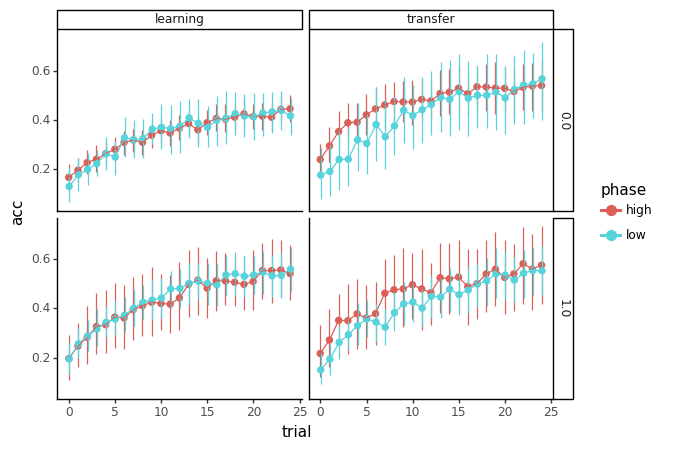

<ggplot: (116281977866)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\2_LearnCurves_BlockAvg.png


In [25]:
g = (gg.ggplot(learn_curves_sum, gg.aes('trial', 'acc', color='phase'))
     + gg.stat_summary(position=gg.position_dodge(width=0.1))
     + gg.stat_summary(position=gg.position_dodge(width=0.1), geom='line')
     + gg.facet_grid('phaseNum ~ trial_type')
    )
print(g)
g.save(os.path.join(plot_dir, '2_LearnCurves_BlockAvg.png'))

## Perseverance: Following old rules after transfer

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\5_PerseveranceLowRules_all.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\5_PerseveranceLowRules.png


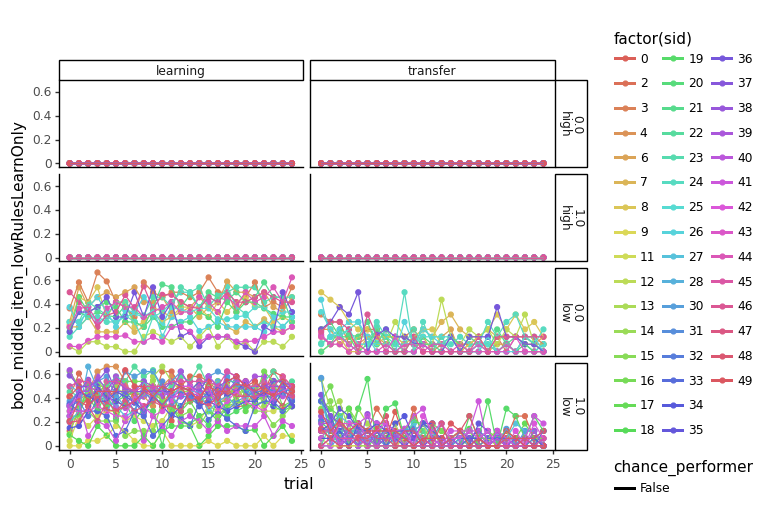

<ggplot: (116296415856)>

In [28]:
def plot_PerseveraceLowRules(dat, suf=''):
    
    g = (gg.ggplot(dat, gg.aes('trial', 'bool_middle_item_lowRulesLearnOnly', color='factor(sid)', linetype='chance_performer'))
         + gg.stat_summary(fun_y=np.mean, geom='point')
         + gg.stat_summary(fun_y=np.mean, geom='line')
         + gg.facet_grid('phase + phaseNum ~ trial_type')
        )
    g.save(os.path.join(plot_dir, '5_PerseveranceLowRules{}.png'.format(suf)))
    
    return g

# Use
sub_dat = all_data.loc[all_data.subtrial.isin([1, 3])]
pers_all = plot_PerseveraceLowRules(sub_dat, '_all')
pers = plot_PerseveraceLowRules(sub_dat.loc[np.invert(sub_dat['chance_performer'])])
pers

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\5_PerseveranceHighRules_all.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\5_PerseveranceHighRules.png


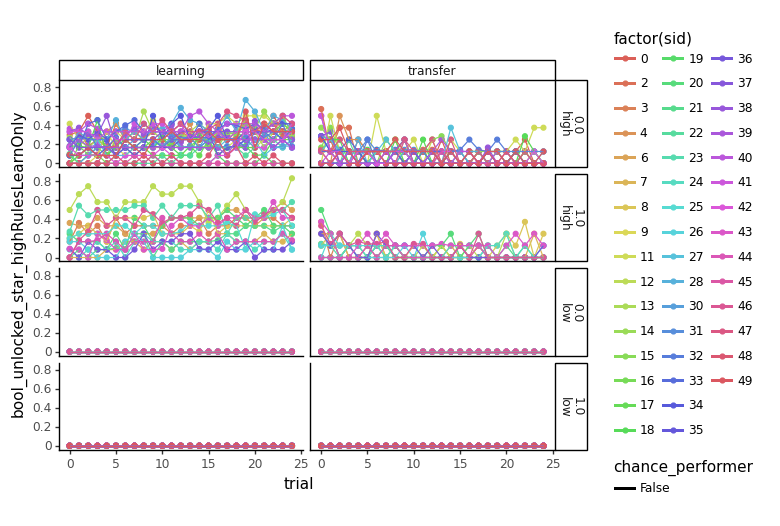

<ggplot: (116308544446)>


In [29]:
pers_all2 = pers_all + gg.aes(y='bool_unlocked_star_highRulesLearnOnly')
pers_all2.data = pers_all.data.loc[pers_all.data.subtrial == 3]
pers_all2.save(os.path.join(plot_dir, '5_PerseveranceHighRules_all.png'))

pers2 = pers + gg.aes(y='bool_unlocked_star_highRulesLearnOnly')
pers2.data = pers.data.loc[pers.data.subtrial == 3]
pers2.save(os.path.join(plot_dir, '5_PerseveranceHighRules.png'))
print(pers2)

## Analyzing performance by level

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\6_DetailsLowTransferRules_all.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\6_DetailsLowTransferRules.png


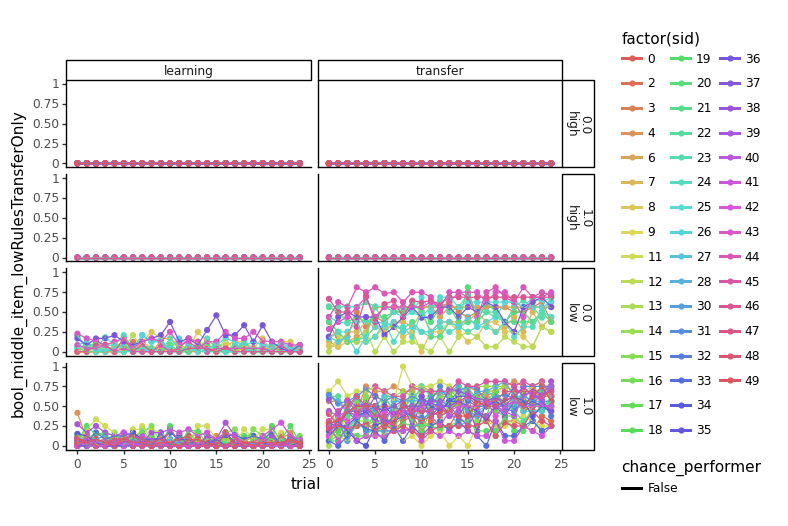

<ggplot: (116283487350)>

In [30]:
pers_all3 = pers_all + gg.aes(y='bool_middle_item_lowRulesTransferOnly')
pers_all3.save(os.path.join(plot_dir, '6_DetailsLowTransferRules_all.png'))

pers3 = pers + gg.aes(y='bool_middle_item_lowRulesTransferOnly')
pers3.save(os.path.join(plot_dir, '6_DetailsLowTransferRules.png'))
pers3

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\6_DetailsHighTransferRules_all.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\6_DetailsHighTransferRules.png


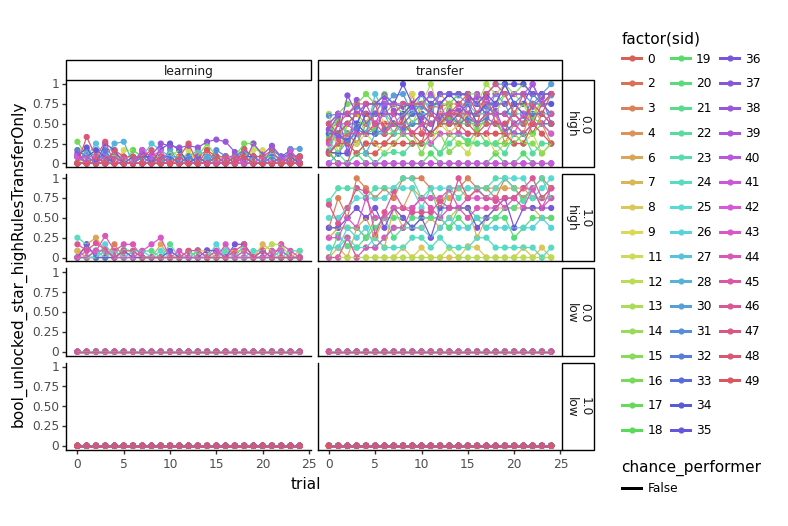

<ggplot: (116305943450)>

In [31]:
pers_all4 = pers_all2 + gg.aes(y='bool_unlocked_star_highRulesTransferOnly')
pers_all4.save(os.path.join(plot_dir, '6_DetailsHighTransferRules_all.png'))

pers4 = pers2 + gg.aes(y='bool_unlocked_star_highRulesTransferOnly')
pers4.save(os.path.join(plot_dir, '6_DetailsHighTransferRules.png'))
pers4

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\6_DetailsLowBothRules_all.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\6_DetailsLowBothRules.png


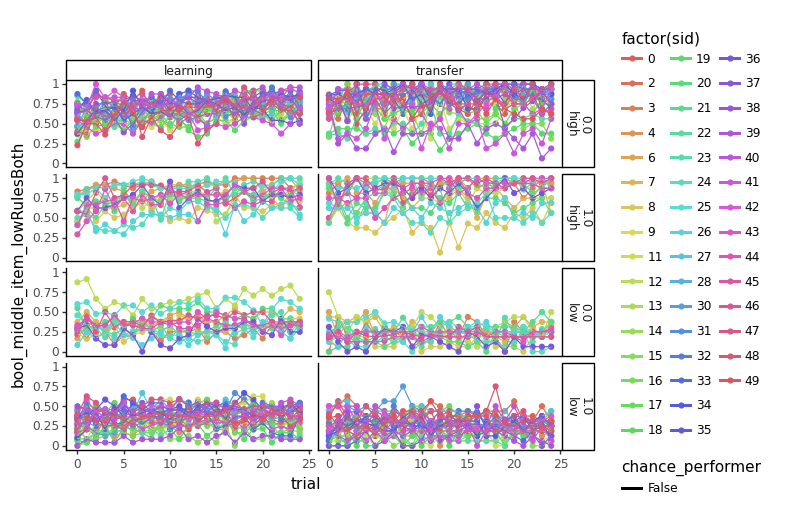

<ggplot: (116308705184)>

In [32]:
pers_all6 = pers_all + gg.aes(y='bool_middle_item_lowRulesBoth')
pers_all6.save(os.path.join(plot_dir, '6_DetailsLowBothRules_all.png'))

pers6 = pers + gg.aes(y='bool_middle_item_lowRulesBoth')
pers6.save(os.path.join(plot_dir, '6_DetailsLowBothRules.png'))
pers6

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\6_DetailsHighBothRules_all.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\6_DetailsHighBothRules.png


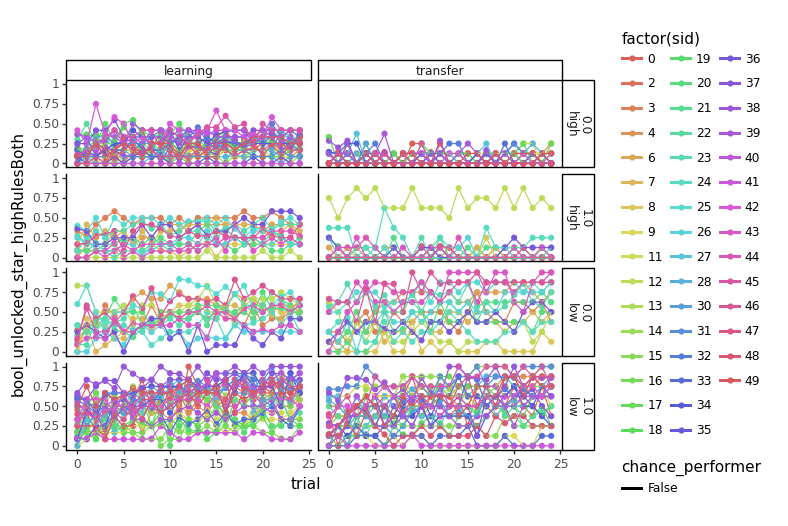

<ggplot: (116311938982)>

In [33]:
pers_all5 = pers_all2 + gg.aes(y='bool_unlocked_star_highRulesBoth')
pers_all5.save(os.path.join(plot_dir, '6_DetailsHighBothRules_all.png'))

pers5 = pers2 + gg.aes(y='bool_unlocked_star_highRulesBoth')
pers5.save(os.path.join(plot_dir, '6_DetailsHighBothRules.png'))
pers5

## Time frame for learning low / high rules

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\7_TimeFrameLearnRulesLowLearn_all
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\7_TimeFrameLearnRulesLowLearn
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\7_TimeFrameLearnRulesLowTrans_all
C:\Users\maria\Anaconda

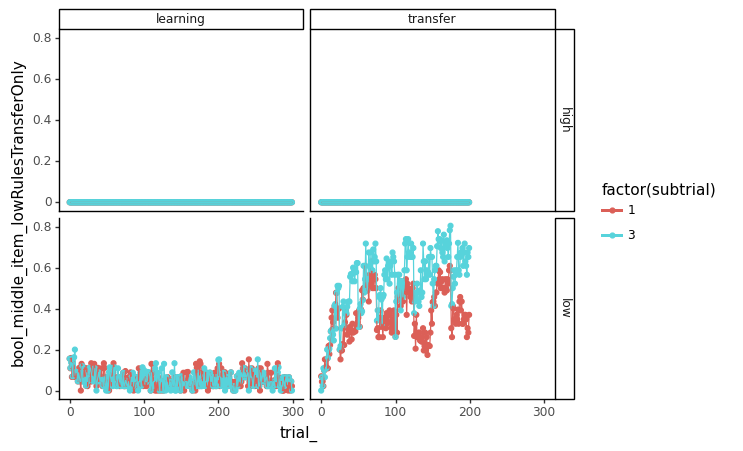

<ggplot: (116297020817)>

In [34]:
# How fast are low rules learnt? How many middle-items are produced through learning?
def plot_TimeframeLearnRules(dat, suf):
    
    # Get data
    if 'Low' in suf:
        sub_dat = dat.loc[dat['subtrial'].isin([1, 3])]  # Select subtrials 1 and 3, in which middle-items *can* appear
        y = 'bool_middle_item_lowRulesLearnOnly'
        if 'Trans' in suf:
            y = 'bool_middle_item_lowRulesTransferOnly'

    elif 'High' in suf:
        sub_dat = all_data.loc[all_data['subtrial'] == 3]  # Select subtrial 3, in which stars *can* appear
        y = 'bool_unlocked_star_highRulesLearnOnly'
        if 'Trans' in suf:
            y = 'bool_unlocked_star_highRulesTransferOnly'
    else:
        raise(ValueError, 'suf must contain either "Low", or "High".')

    # Plot
    g = (gg.ggplot(sub_dat, gg.aes('trial_', y, color='factor(subtrial)'))
         + gg.stat_summary(fun_y=np.mean, geom='point')
         + gg.stat_summary(fun_y=np.mean, geom='line')
         + gg.facet_grid('phase ~ trial_type')
        )
    g.save(os.path.join(plot_dir, '7_TimeFrameLearnRules{}'.format(suf)))
    
    return g

# Use
plot_TimeframeLearnRules(all_data, 'LowLearn_all')
plot_TimeframeLearnRules(incl_data, 'LowLearn')
plot_TimeframeLearnRules(all_data, 'LowTrans_all')
plot_TimeframeLearnRules(incl_data, 'LowTrans')

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\7_TimeFrameLearnRulesHighLearn_all
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\7_TimeFrameLearnRulesHighLearn
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\7_TimeFrameLearnRulesHighTrans_all
C:\Users\maria\Anaco

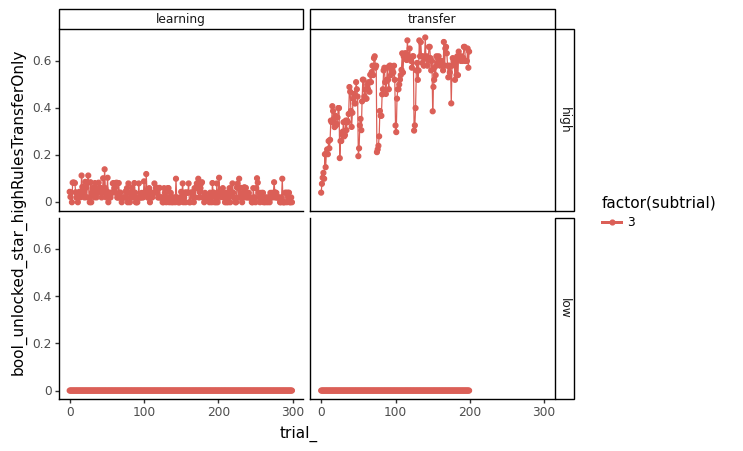

<ggplot: (116306487911)>

In [35]:
plot_TimeframeLearnRules(all_data, 'HighLearn_all')
plot_TimeframeLearnRules(incl_data, 'HighLearn')
plot_TimeframeLearnRules(all_data, 'HighTrans_all')
plot_TimeframeLearnRules(incl_data, 'HighTrans')

## Overall rules in training / transfer high / low

In [37]:
# # Hypothesis: Previous rules (high-level or low-level) persist significantly after they stop being valuable
# # (compared to baseline of not-yet-learned rules). There is a difference between high- and low-level (especially
# # early-on, i.e., in the first few blocks).
# g = (gg.ggplot(item_sum_dat, gg.aes('trial_type', color='factor(sid)', group='factor(sid)'))
#      + gg.geom_point()
#      + gg.geom_line()
#      + gg.facet_grid('phaseNum ~ phase')
#     )

# for col in goal_cols:
#     name = col.split('_')[-1]
#     g_col = g + gg.aes(y=col)
#     g_col.save(os.path.join(plot_dir, '8_Performance{}.png'.format(name)))
#     print(g_col)

## Forgetting of old rules and learning of new rules during transfer

In [38]:
id_cols = ['sid', 'phase', 'trial_type', 'block']
sum_rules = incl_data.loc[incl_data.subtrial.isin([1, 3]), id_cols + goal_cols].groupby(id_cols).aggregate('mean').reset_index()
sum_rules = sum_rules.melt(id_vars=id_cols, var_name='rule', value_name='acc')
sum_rules.loc[sum_rules.rule.isin([c for c in set(sum_rules.rule) if 'high' in c]), 'acc'] *= 2
sum_rules

NameError: name 'goal_cols' is not defined

In [41]:
# Hypothesis: middle-layer items are easier (faster) to learn, but harder (slower) to unlearn than high-level stars
# Reason: There is a difference in the level of abstraction. The deeper down, the harder to unlearn. Maybe only
# the top-level is still malleable.
g = (gg.ggplot(gg.aes('block', 'acc', color='rule'))
     + gg.stat_summary(position=gg.position_dodge(width=0.1))
     + gg.stat_summary(position=gg.position_dodge(width=0.1), geom='line')
     + gg.coord_cartesian(ylim=(0, 1))
     + gg.facet_grid('phaseNum ~ phase + trial_type')
    )

g_high = g
g_high.data = sum_rules.loc[
    sum_rules.rule.isin([c for c in set(sum_rules.rule) if 'high' in c]) &
    (sum_rules.phase == 'high') #& (sum_rules.trial_type == 'transfer')
]
g_high.save(os.path.join(plot_dir, '10_ForgettingRelearningHighRules.png'))
print(g_high)

g_low = g
g_low.data = sum_rules.loc[
    sum_rules.rule.isin([c for c in set(sum_rules.rule) if 'low' in c]) &
    (sum_rules.phase == 'low') #& (sum_rules.trial_type == 'transfer')
]
g_low.save(os.path.join(plot_dir, '10_ForgettingRelearninglowRules.png'))
print(g_low)

NameError: name 'sum_rules' is not defined